In [2]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt
import cellpylib as cpl
from modules import triangulize_evolution
from modules import find_elem_jams
import scipy


In [17]:
p = 0.39
L = 1000
T = int(L / 2)


In [18]:
def calculate_jam_size(cellular_automaton_triangle):
    jam_size = {}
    automaton_shape = cellular_automaton_triangle.shape
    
    for row in range(automaton_shape[0]-1):                             #For every step in time
        for column in range(automaton_shape[1]):                        #For every step in space
            state = cellular_automaton_triangle[row, column]
            new_state = cellular_automaton_triangle[row+1, column]

            original_jam_column = column + row

            if state == 1 and new_state == 1:                           #If the car is stationairy add one to the "jam number", which is the original cell in which the jam originated
                if original_jam_column not in jam_size:
                    jam_size[original_jam_column] = 1
                else:
                    jam_size[original_jam_column] += 1

    return jam_size

def remove_short_jams(jam_sizes):
    jam_sizes_copy = jam_sizes.copy()
    previous_jam_size = 0
    removed_jams = []
    for key in jam_sizes_copy.keys():
        if jam_sizes_copy[key] <= previous_jam_size:                    #Check if the jam size is smaller or equal compared to previous jams, if so it will be removed
            removed_jams.append(key)
        else:
            previous_jam_size = jam_sizes_copy[key]

    for jam in removed_jams:
        jam_sizes_copy.pop(jam)

    return jam_sizes_copy, removed_jams

def merge_jams(jam_sizes):
    lists = sorted(jam_sizes.items())
    jam, size = zip(*lists) 
    jam = np.array(jam)
    size = np.array(size)

    for index in range(len(jam)-1):
        if jam[index+1] == jam[index] + 1:                              #If the jams are neighbouring eachother, merge them into the righter jam
            size[index+1] += size[index]
            size[index] = 0
            
    sizes = [i for i in size if i != 0]                                 #Remove zeroes from list


    return sizes

def run_simulation(N):
    final_jams_list = []
    for _ in range(N):
        ca_184 = CA()

        initial_state = ca_184.gen_initial_state_bernoulli(L, p)

        cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
        cellular_automaton_triangle = triangulize_evolution(cellular_automaton)

        jam_sizes = calculate_jam_size(cellular_automaton_triangle)
        jam_sizes_short, removed_jams = remove_short_jams(jam_sizes)
        final_jams = merge_jams(jam_sizes_short)
        final_jams_list.extend(final_jams)

    final_jams_counted = Counter(final_jams_list)

    return final_jams_counted

    

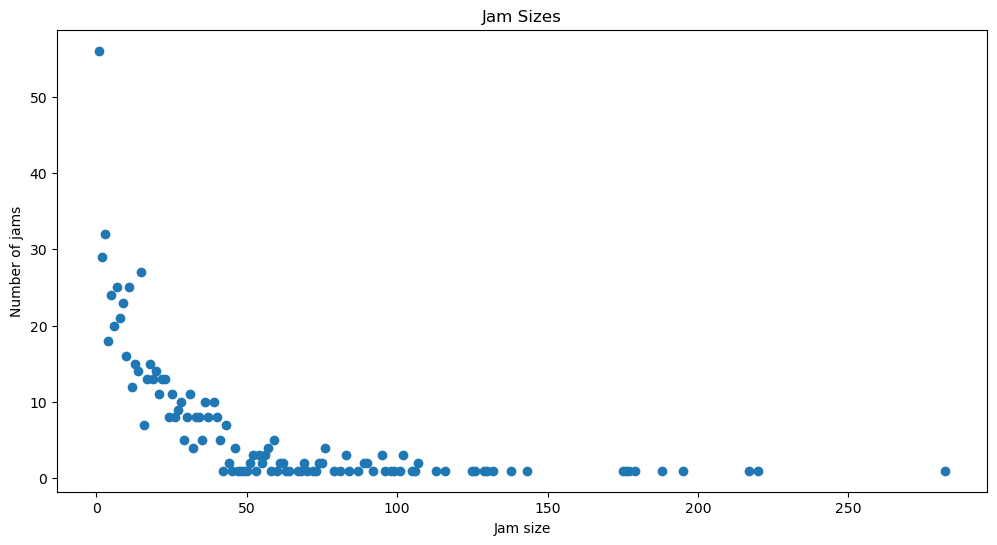

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 72, 73, 74, 75, 76, 79, 81, 83, 84, 87, 89, 90, 92, 95, 96, 98, 99, 101, 102, 105, 106, 107, 113, 116, 125, 126, 129, 130, 132, 138, 143, 175, 176, 177, 179, 188, 195, 217, 220, 282)
(56, 29, 32, 18, 24, 20, 25, 21, 23, 16, 25, 12, 15, 14, 27, 7, 13, 15, 13, 14, 11, 13, 13, 8, 11, 8, 9, 10, 5, 8, 11, 4, 8, 8, 5, 10, 8, 10, 8, 5, 1, 7, 2, 1, 4, 1, 1, 1, 1, 2, 3, 1, 3, 2, 3, 4, 1, 5, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
Number of elementary jam size values: 107


In [19]:
N=100
final_jams_counted = run_simulation(N)
lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.plot(x, y, 'o')
plt.show()

print(x)
print(y)
print(f"Number of elementary jam size values: {len(final_jams_counted.keys())}")

58.18500070007975 0.6191097802281994


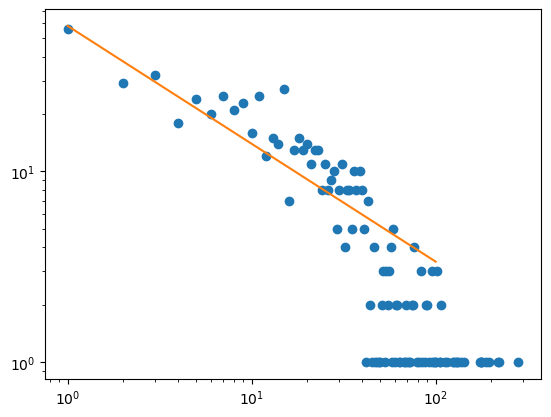

In [21]:
def func(x, a, b):
    return a * x ** -b

plt.plot(x,y,'o')

popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=[1, 0.5])
a_optimal, b_optimal = popt

print(a_optimal, b_optimal)

x_fit=np.linspace(1,10**2,1000)
y_fit = []
for value in x_fit:
    y_fit.append(func(value, a_optimal, b_optimal))

plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit,y_fit)